In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [2]:
data=pd.read_excel("Datasets/CocaCola.xlsx")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

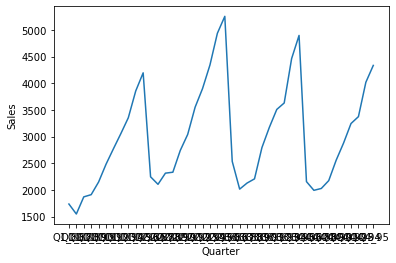

In [3]:
sns.lineplot(x="Quarter",y="Sales",data=data)

In [4]:
Train = data.head(133)
Test = data.tail(12)

In [5]:
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [6]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) # 9.681026212917576

C:\Users\Pavan K M\anaconda3\envs\New Version\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


9.681026212917576

In [7]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) # 11.025174865752454

11.025174865752454

In [8]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) # 5.054127892934732

5.054127892934732

In [9]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) # 2.13995671078303

2.13995671078303

In [10]:
# Lets us use auto_arima from p
from pmdarima import auto_arima
auto_arima_model = auto_arima(Train["Sales"],start_p=0,
                              start_q=0,max_p=10,max_q=10,
                              m=12,start_P=0,seasonal=True,
                              d=1,D=1,trace=True,error_action="ignore",
                              suppress_warnings= True,
                              stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=402.446, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=404.444, Time=0.08 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=406.376, Time=0.18 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=404.444, Time=0.18 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=406.375, Time=0.26 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=404.443, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=406.440, Time=0.13 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=408.375, Time=0.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=406.441, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,1)(2,1,0)[12]          

In [11]:
auto_arima_model.predict_in_sample( )

array([   0.        , 1739.98595679, 2217.49037422, 2513.52520498,
       2169.84550741, 1580.5337708 , 2128.33982713, 1972.35445733,
       1964.15441576, 1895.59302528, 2340.1544899 , 2099.81445574,
       2881.93543698, 2415.24468896, 2676.35055783, 1820.5071752 ,
       1793.5375441 , 2621.63892214, 2313.19650626, 2885.03992166,
       2561.86249311, 3050.14295558, 2979.28851529, 2897.79573345,
       2587.62335616, 3318.43808774, 3713.61058257, 3066.64069549,
       3004.73668055, 3788.35887644, 3736.04941843, 3388.05587759,
       3436.5091691 , 4028.79641539, 4196.49358252, 4046.35831255,
       3843.60028809, 4736.67407754, 5006.51715003, 4452.77769685,
       4157.71762699, 5284.5413161 ])

In [12]:
pred_test_auto_arima = pd.Series(auto_arima_model.predict(n_periods=12))
pred_test_auto_arima.index = Test.index
MAPE(pred_test_auto_arima,Test.Sales) 

29.787336698097334

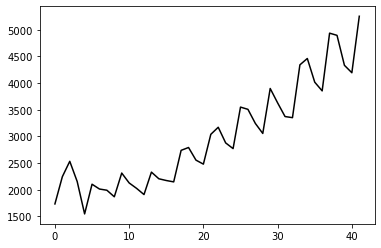

In [13]:
plt.plot(Train.index, Train["Sales"], label='Train',color="black")

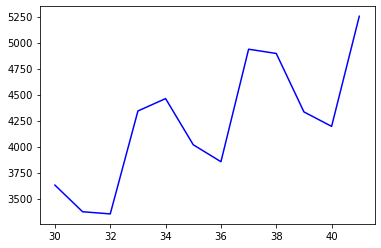

In [14]:
plt.plot(Test.index, Test["Sales"], label='Test',color="Blue")

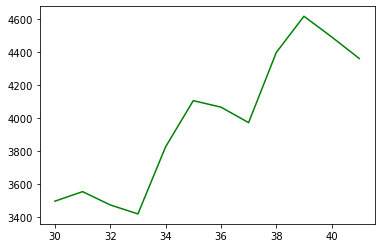

In [15]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")

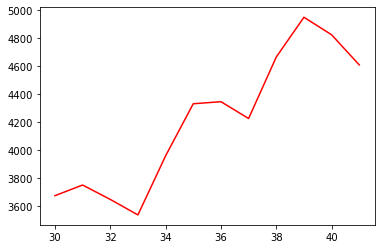

In [16]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")

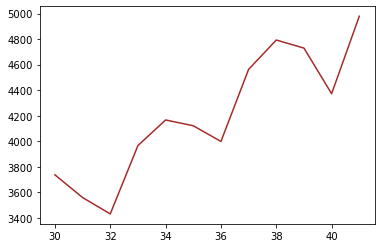

In [17]:
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")

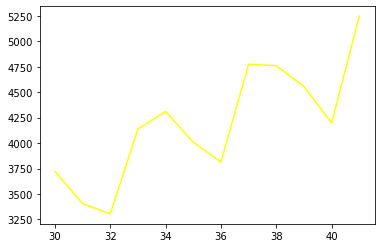

In [18]:
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")

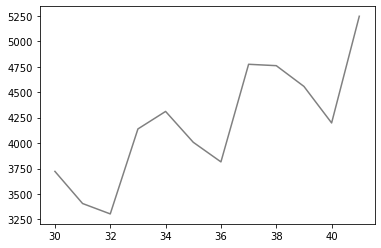

In [19]:
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="Auto_Arima",color="grey")

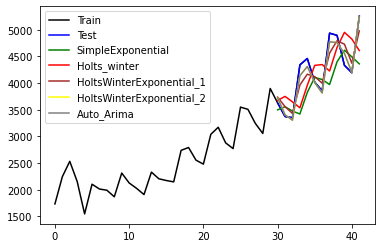

In [20]:
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="Auto_Arima",color="grey")
plt.legend(loc='best')

In [21]:
model_mapes = pd.DataFrame(columns=["model_name","mape"])
model_mapes["model_name"] = ['SimpleExponential','Holts_winter',"HoltsWinterExponential_1","HoltsWinterExponential_2",'Auto_Arima']
model_mapes['mape']=[9.681026212917576,11.025174865752454,5.054127892934732,2.13995671078303,29.787336698097334]

In [22]:
model_mapes

,model_name,mape
0,SimpleExponential,9.681026
1,Holts_winter,11.025175
2,HoltsWinterExponential_1,5.054128
3,HoltsWinterExponential_2,2.139957
4,Auto_Arima,29.787337


C:\Users\Pavan K M\anaconda3\envs\New Version\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


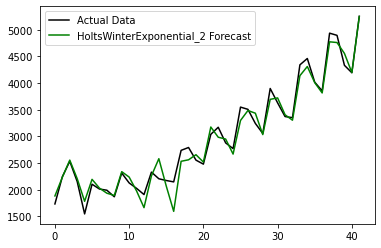

In [31]:
# The HoltsWinterExponential_2 have the least mape value so lets proceed with this 
hwe_model_mul_add = ExponentialSmoothing(data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = data.index[0],end = data.index[-1])

plt.plot(data.index, data["Sales"], label='Actual Data',color="black")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2 Forecast",color="green")
plt.legend(loc='best')

In [32]:
pred_hwe_mul_add

0     1884.469296
1     2234.315108
2     2556.153029
3     2208.865867
4     1783.850805
5     2196.066724
6     2030.951086
7     1935.746806
8     1893.996816
9     2339.816839
10    2238.220508
11    1978.107170
12    1665.223536
13    2260.884882
14    2582.821864
15    2069.039104
16    1595.881855
17    2534.231034
18    2562.114784
19    2657.496814
20    2519.808556
21    3176.906524
22    2985.079961
23    2951.128384
24    2669.223879
25    3299.459090
26    3486.013859
27    3435.538611
28    3034.748844
29    3695.379570
30    3722.095705
31    3406.507600
32    3304.464669
33    4138.848726
34    4310.865002
35    4007.915257
36    3815.351869
37    4773.801717
38    4760.200932
39    4556.407195
40    4197.793805
41    5245.479139
dtype: float64

In [33]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996
